In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas.io.data import DataReader

from datetime import datetime

from __future__ import division

/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
endtime = datetime.now()
starttime = datetime(endtime.year - 1, endtime.month, endtime.day)
stocks = ['AAPL','GOOG','AMZN','MSFT','NKE']

In [4]:
for stock in stocks:
    globals()[stock] = DataReader(stock,'yahoo',starttime,endtime)


In [5]:
AAPL.describe()

Open        High         Low       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean   109.436032  110.308095  108.774325  109.614484  3.451566e+07   
std     10.864175   10.877974   10.956209   10.982760  1.528875e+07   
min     90.000000   91.669998   89.470001   90.339996  1.147590e+07   
25%    100.584999  101.715002  100.047501  100.875000  2.587255e+07   
50%    108.900002  110.015000  108.224998  109.095001  3.029005e+07   
75%    115.439998  116.502500  114.815002  115.857500  3.741385e+07   
max    140.000000  140.279999  138.759995  139.789993  1.146021e+08   

        Adj Close  
count  252.000000  
mean   108.487552  
std     11.409683  
min     89.008370  
25%     98.936297  
50%    107.806690  
75%    115.234847  
max    139.789993

In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-03-04 to 2017-03-03
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


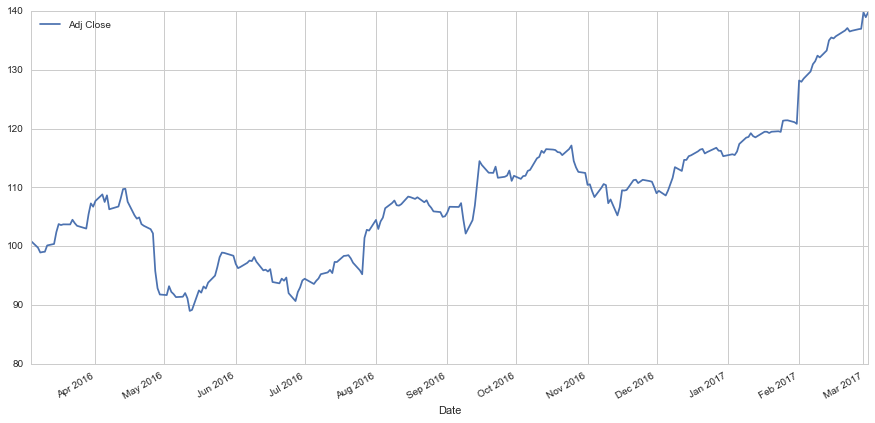

In [7]:
AAPL['Adj Close'].plot(legend = True, figsize = (15,7))

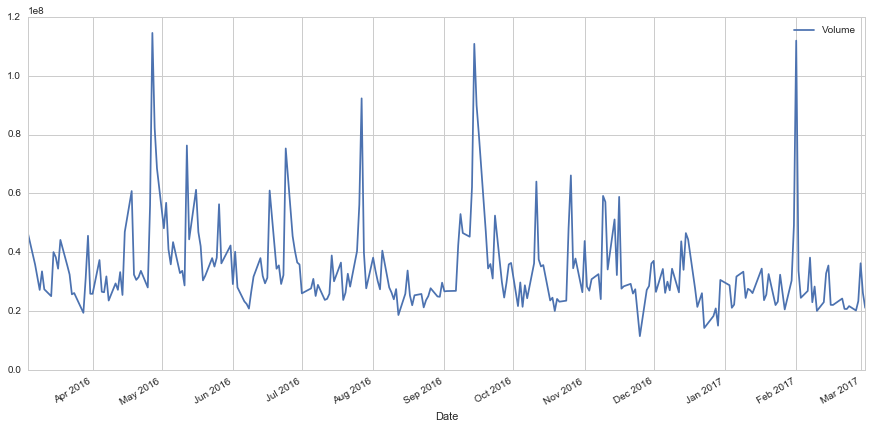

In [8]:
AAPL['Volume'].plot(legend = True, figsize = (15,7))

/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  if __name__ == '__main__':
/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  from ipykernel import kernelapp as app


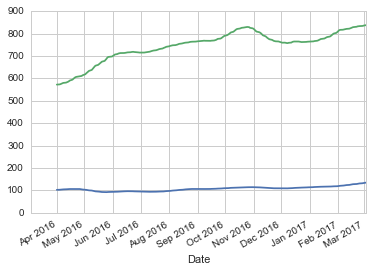

In [9]:
pd.rolling_mean(AAPL['Adj Close'],20).plot()
pd.rolling_mean(AMZN['Adj Close'],20).plot()

In [10]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

def add_norm_column(stock):
    x = stock['Adj Close']
    x_scaled = pd.Series(scaler.fit_transform(x), index = stock.index)
    stock['Normalized Adj Close'] = x_scaled

In [11]:
add_norm_column(AAPL)
add_norm_column(AMZN)
add_norm_column(GOOG)
add_norm_column(MSFT)
add_norm_column(NKE)


/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.re

/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  if __name__ == '__main__':
/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  from ipykernel import kernelapp as app
/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  app.launch_new_instance()
/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, rep

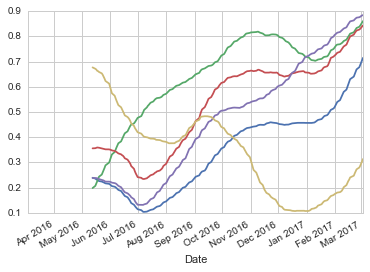

In [12]:
pd.rolling_mean(AAPL['Normalized Adj Close'],50).plot()
pd.rolling_mean(AMZN['Normalized Adj Close'],50).plot()
pd.rolling_mean(GOOG['Normalized Adj Close'],50).plot()
pd.rolling_mean(MSFT['Normalized Adj Close'],50).plot()
pd.rolling_mean(NKE['Normalized Adj Close'],50).plot()

In [13]:
np.corrcoef(AAPL['Normalized Adj Close'],NKE['Normalized Adj Close'])

array([[ 1.        , -0.24678883],
       [-0.24678883,  1.        ]])

In [14]:
mas = [10,20,50]

for stock in [AAPL,GOOG,AMZN,MSFT,NKE]:
    for ma in mas:
        column_name = 'MA for %s days'%str(ma)
        stock[column_name] = pd.rolling_mean(stock['Adj Close'],ma)


/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


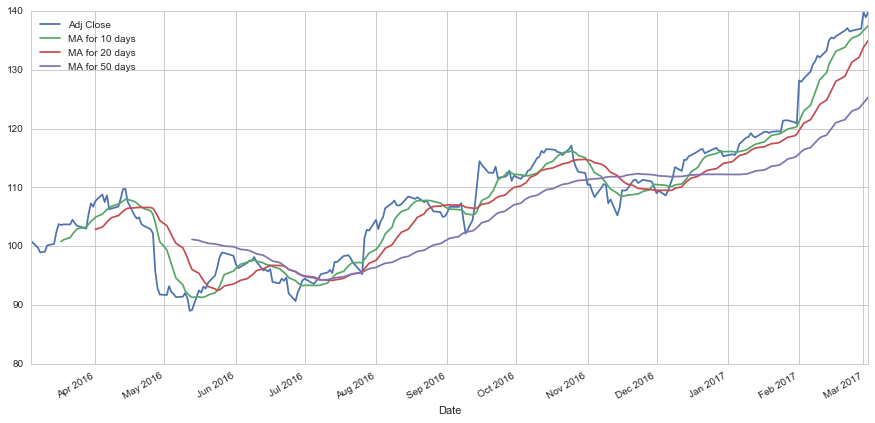

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize = (15,7))

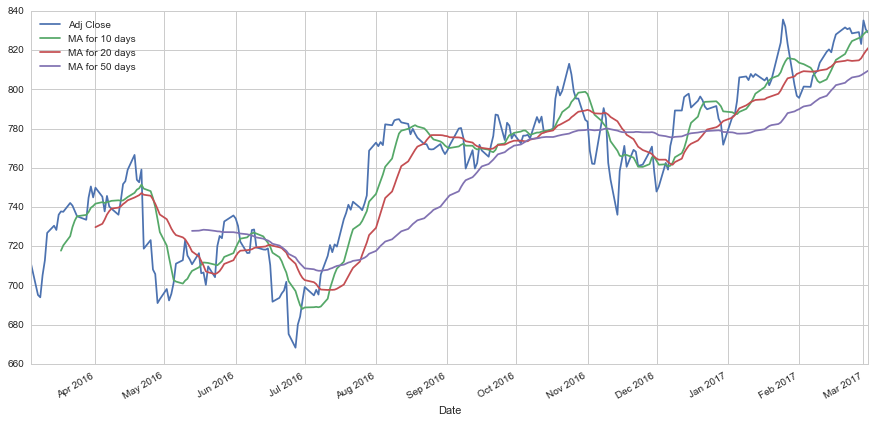

In [16]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize = (15,7))

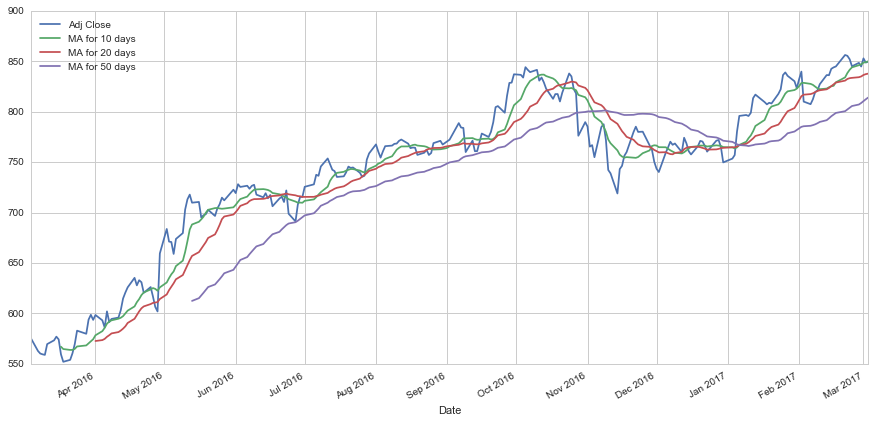

In [17]:
AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize = (15,7))

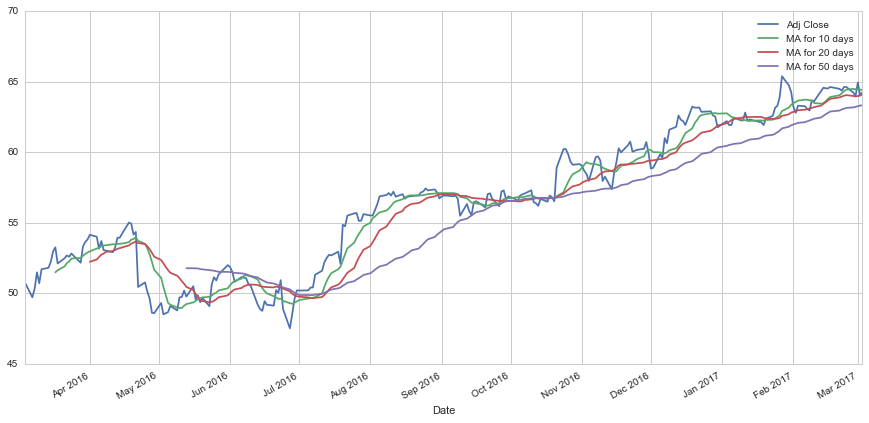

In [18]:
MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize = (15,7))

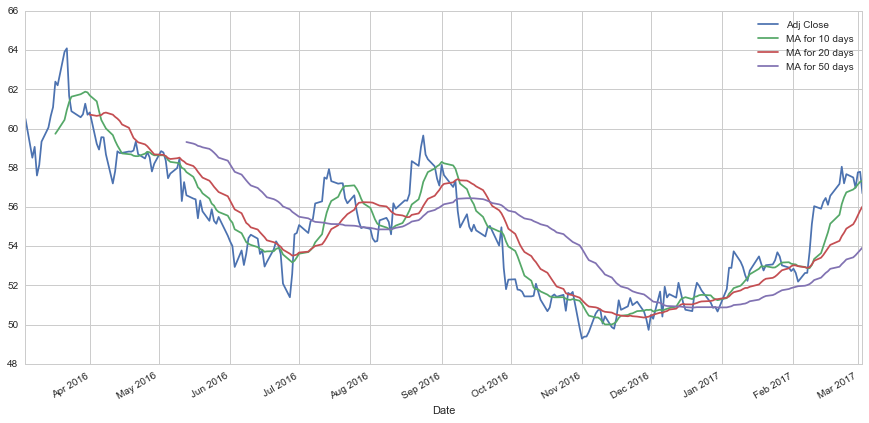

In [19]:
NKE[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize = (15,7))

In [20]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()

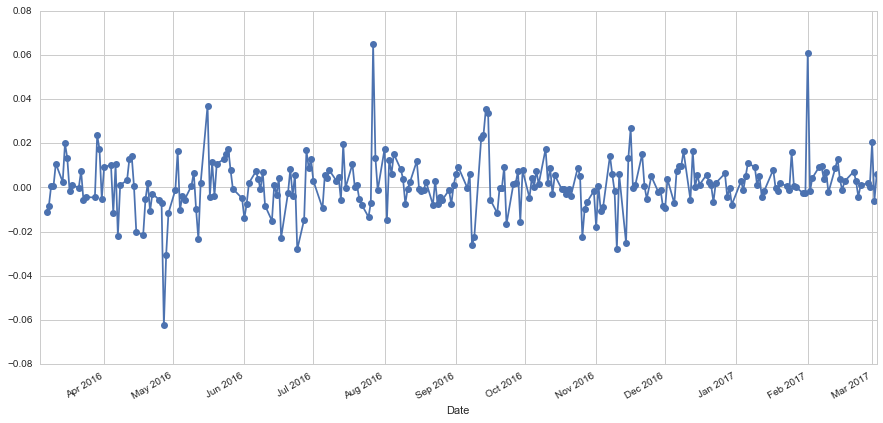

In [21]:
AAPL['Daily Returns'].plot(figsize = (15,7), marker = 'o')

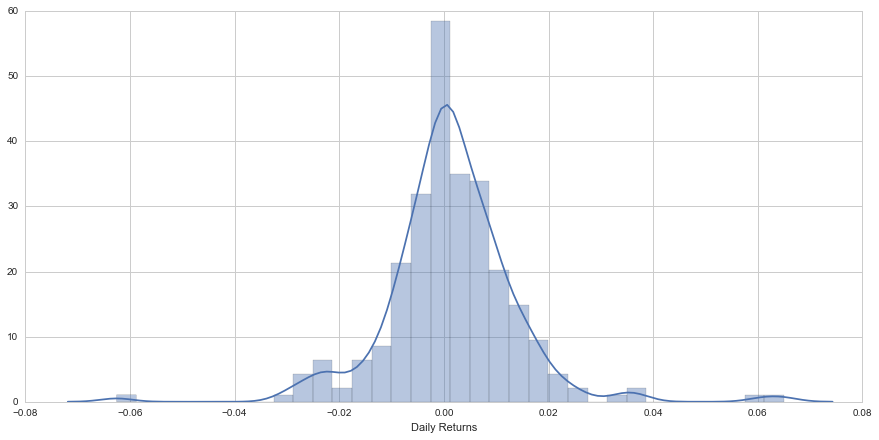

In [22]:
plt.figure(figsize=(15,7))
sns.distplot(AAPL['Daily Returns'].dropna())


In [23]:
closing_df = DataReader(['GOOG','AAPL','AMZN','MSFT','NKE'],'yahoo',starttime,endtime)['Adj Close']
closing_df.head()

AAPL        AMZN        GOOG       MSFT        NKE
Date                                                                
2016-03-04  100.877427  575.140015  710.890015  50.696659  60.504509
2016-03-07   99.761029  562.799988  695.159973  49.722286  58.519299
2016-03-08   98.938415  560.260010  693.969971  50.326400  59.072395
2016-03-09   99.026556  559.469971  705.239990  51.485903  57.610647
2016-03-10   99.075516  558.929993  712.820007  50.716147  58.153864

In [24]:
rets = closing_df.pct_change()
rets.head()

AAPL      AMZN      GOOG      MSFT       NKE
Date                                                        
2016-03-04       NaN       NaN       NaN       NaN       NaN
2016-03-07 -0.011067 -0.021456 -0.022127 -0.019220 -0.032811
2016-03-08 -0.008246 -0.004513 -0.001712  0.012150  0.009452
2016-03-09  0.000891 -0.001410  0.016240  0.023040 -0.024745
2016-03-10  0.000494 -0.000965  0.010748 -0.014951  0.009429

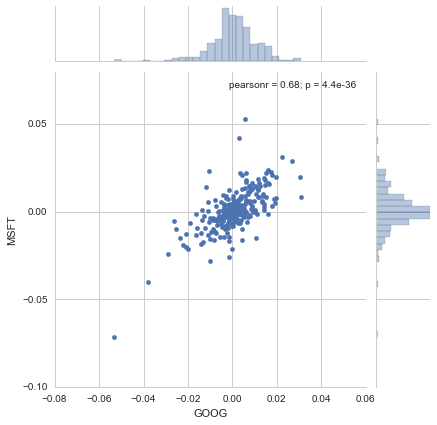

In [25]:
sns.jointplot('GOOG','MSFT',rets,kind='scatter')

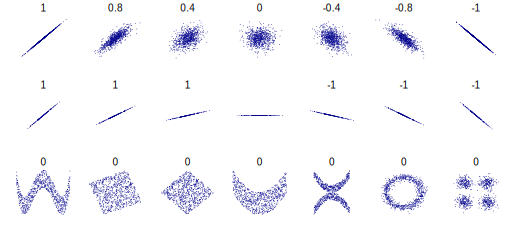

In [26]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

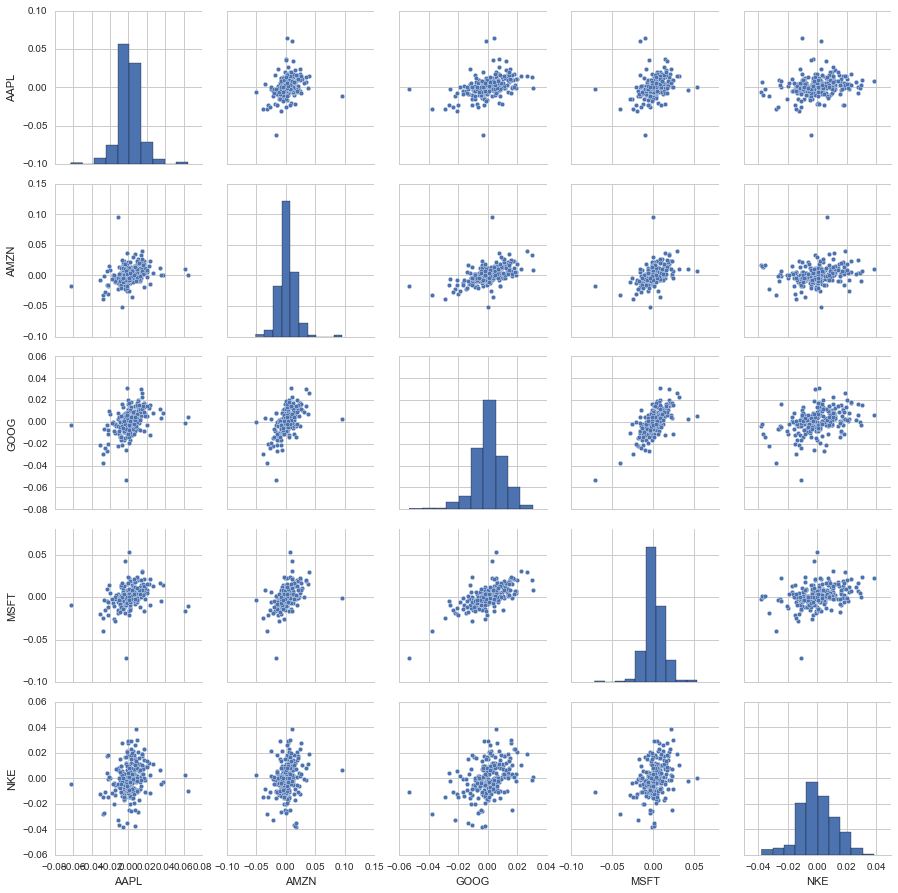

In [27]:
sns.pairplot(rets.dropna())

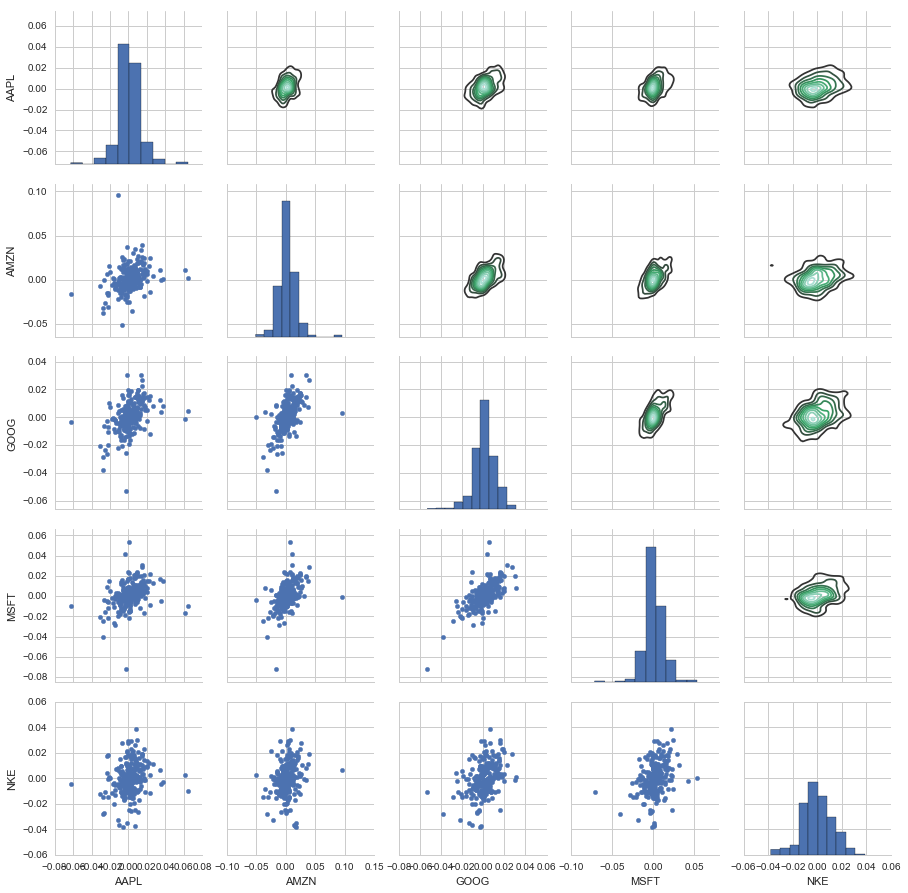

In [28]:
ret_fig = sns.PairGrid(rets.dropna())
ret_fig.map_lower(plt.scatter)
ret_fig.map_upper(sns.kdeplot)
ret_fig.map_diag(plt.hist)

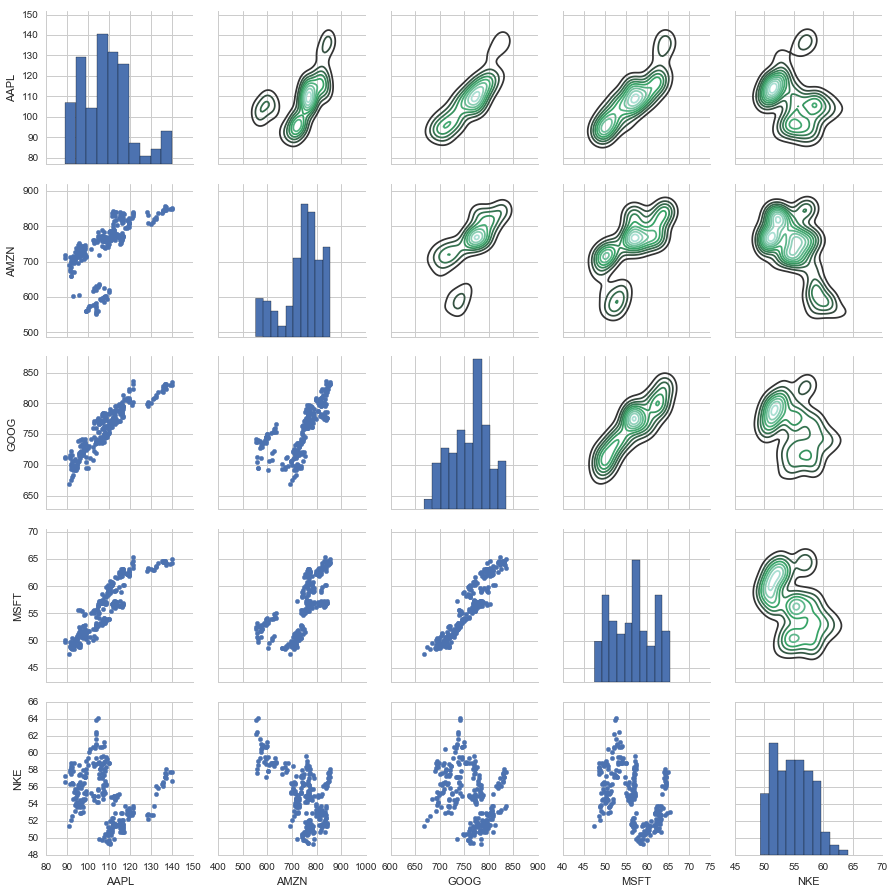

In [29]:
ret_fig = sns.PairGrid(closing_df.dropna())
ret_fig.map_lower(plt.scatter)
ret_fig.map_upper(sns.kdeplot)
ret_fig.map_diag(plt.hist)

In [30]:
np.corrcoef(closing_df.AMZN,closing_df.GOOG)

array([[ 1.        ,  0.70560757],
       [ 0.70560757,  1.        ]])

In [31]:
np.corrcoef(closing_df.NKE,closing_df.AAPL)

array([[ 1.        , -0.24678883],
       [-0.24678883,  1.        ]])

In [32]:
rets.dropna(inplace=True)

# Risk Analysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

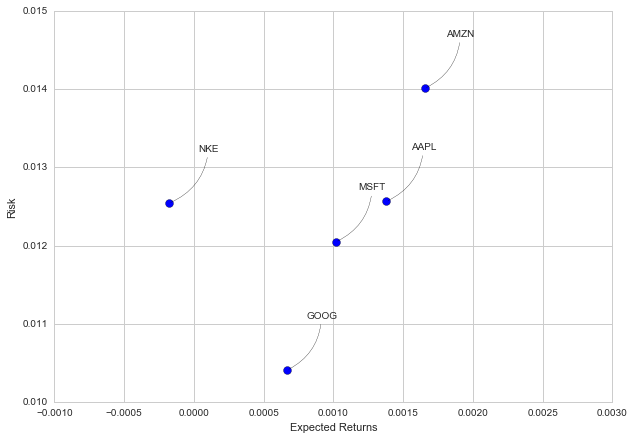

In [33]:
plt.figure(figsize=(10,7))

plt.scatter(rets.mean(),rets.std(),s=np.pi*20)
plt.xlim([-0.001,0.003])
plt.ylim([0.01,0.015])
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [34]:
GOOG['Daily Returns'] = GOOG['Adj Close'].pct_change()


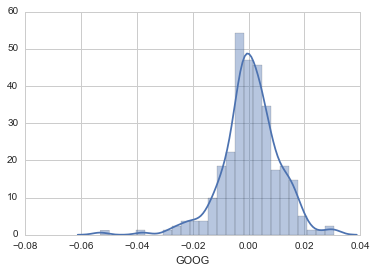

In [35]:
sns.distplot(rets['GOOG'])

In [36]:
print 'GOOGLE: ', rets['GOOG'].quantile(0.05)
print 'NKE: ', rets['NKE'].quantile(0.05)
print 'AAPL: ', rets['AAPL'].quantile(0.05)
print 'MSFT: ', rets['MSFT'].quantile(0.05)
print 'AMZN: ', rets['AMZN'].quantile(0.05)


GOOGLE:  -0.0163334587736
NKE:  -0.0194183412576
AAPL:  -0.0190633539692
MSFT:  -0.0162614849782
AMZN:  -0.0180057027561


The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

ΔS=S(μΔt+σϵ√Δt)

In [37]:
# Now lets make function for mobte carlo simulation

def stock_monte_carlo(start_price,mu,days,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    drift = np.zeros(days)
    shock = np.zeros(days)
    dt = 1 / days
    
    for x in xrange(1,days):
        drift[x] = mu * dt
        shock[x] = np.random.normal(loc= mu * dt, scale=sigma*np.sqrt(dt))
        price[x] = price[x-1] + price[x-1]*(drift[x] + shock[x])
    
    return price

In [38]:
# Lets simulate google's stock
start_price_google = GOOG['Adj Close'][0]
mu_google = rets['GOOG'].mean()
sigma_google = rets['GOOG'].std()
days = 365

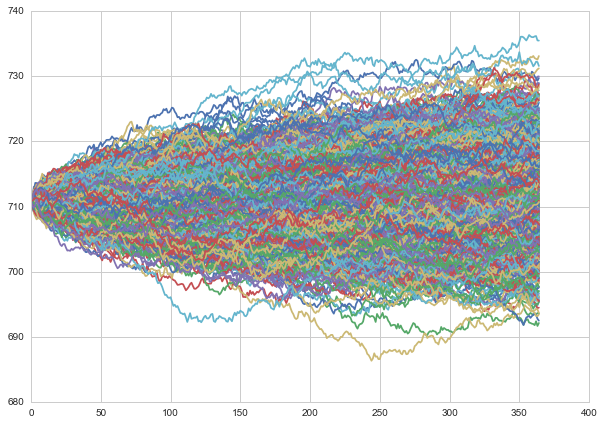

In [39]:
plt.figure(figsize=(10,7))
for run in range(1000):
    plt.plot(stock_monte_carlo(start_price_google,mu_google,days,sigma_google))

In [40]:
start_price_apple = AAPL['Adj Close'][0]
mu_apple = rets['AAPL'].mean()
sigma_apple = rets['AAPL'].std()
days = 365

In [41]:
plt.figure(figsize=(10,7))
for run in range(1000):
    plt.plot(stock_monte_carlo(start_price_apple,mu_apple,days,sigma_apple))

In [42]:
start_price_nike = NKE['Adj Close'][-100]
mu_nike = rets['NKE'].mean()
sigma_nike = rets['NKE'].std()
days = 100

In [43]:
plt.figure(figsize=(10,7))
for run in range(1000):
    plt.plot(stock_monte_carlo(start_price_nike,mu_nike,days,sigma_nike))

In [44]:
# Now Lets do Analysis for google

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_google,mu_google,365,sigma_google)[364]

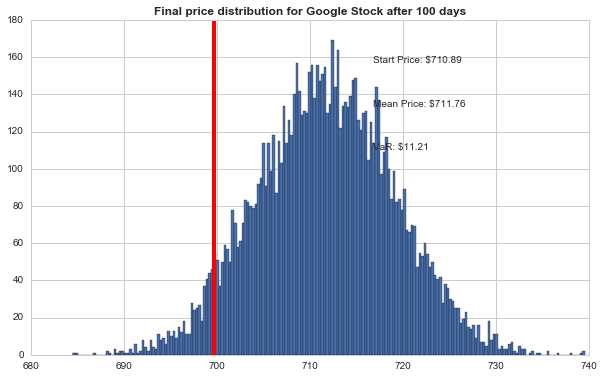

In [45]:
q = np.percentile(simulations, 5)

plt.figure(figsize=(10,6))
plt.hist(simulations, bins = 200)
plt.figtext(0.6,0.8, s = 'Start Price: $%.2f' % start_price_google)
plt.figtext(0.6,0.7, s = 'Mean Price: $%.2f' % simulations.mean())
plt.figtext(0.6,0.6, s = 'VaR: $%.2f' % (start_price_google - q))
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold'); 


In [46]:
# Now Lets do Analysis for google

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_apple,mu_apple,365,sigma_apple)[364]

In [47]:
q = np.percentile(simulations, 5)

plt.figure(figsize=(10,6))
plt.hist(simulations, bins = 200)
plt.figtext(0.6,0.8, s = 'Start Price: $%.2f' % start_price_apple)
plt.figtext(0.6,0.7, s = 'Mean Price: $%.2f' % simulations.mean())
plt.figtext(0.6,0.6, s = 'VaR: $%.2f' % (start_price_apple - q))
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold'); 


In [49]:
AAPL.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2016-03-04  102.370003  103.750000  101.370003  103.010002  46055100   
2016-03-07  102.389999  102.830002  100.959999  101.870003  35828900   
2016-03-08  100.779999  101.760002  100.400002  101.029999  31561900   
2016-03-09  101.309998  101.580002  100.269997  101.120003  27201700   
2016-03-10  101.410004  102.239998  100.150002  101.169998  33513600   

             Adj Close  Normalized Adj Close  MA for 10 days  MA for 20 days  \
Date                                                                           
2016-03-04  100.877427              0.233727             NaN             NaN   
2016-03-07   99.761029              0.211743             NaN             NaN   
2016-03-08   98.938415              0.195544             NaN             NaN   
2016-03-09   99.026556              0.197280             NaN             NaN   
2016-03-10   99.075516              0.198244             NaN             NaN   

            MA for 50 days  Daily Returns  
Date                                       
2016-03-04             NaN            NaN  
2016-03-07             NaN      -0.011067  
2016-03-08             NaN      -0.008246  
2016-03-09             NaN       0.000891  
2016-03-10             NaN       0.000494